In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_blobs

n_samples = 50  # 50 Training points for both cases.
n_test_points = 30


In [2]:
class SVM_STOCH():

    def __init__(self, lambda1=4):

        self.lam = lambda1
        self.weights = np.zeros(3)

        self.weights[0] = 1

    def fit(self, X, Y, iterations):
        
        X = np.hstack((X,np.ones((X.shape[0],1))))
        
        num_S = len(Y)
        
        for i in range(iterations):
            
            it = random.randint(0, num_S-1)
            step = 1/(self.lam*(i+1)) #Starting with T = 2
            
            decision = Y[it] *self.weights @ X[it].T
            
            if decision < 1:
                self.weights = (1 - step*self.lam) * self.weights + step*Y[it]*X[it]
            else:
                self.weights = (1 - step*self.lam) * self.weights
            
            self.weights
            
        return self.weights
                
            
    def plot(self, X, Y, show_ex_line=False, title="Graph"):
                
        #group for plotting
        df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
        names = {-1:'Group 1', 1:'Group 2'}
        colors = {-1:'r', 1:'g'}
        grouped = df.groupby('label')

        #plot settings and labels
        fig = plt.figure(figsize=(13,9))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title(title, fontsize=20)

        #plot the data and example line
        for key, group in grouped:
            ax.scatter(group.x, group.y, label=names[key], color=colors[key],s=75)
            
        if show_ex_line:
            #Graphing just the perceptron's line.
            perceptron_x = np.linspace(-1,8,100)
            perceptron_y = 0.4844639019003475*perceptron_x -2.426163461674154
            ax.plot(perceptron_x, perceptron_y, color="purple", label='Perceptron\'s Line',linewidth=4)
        else:
            #Graph the perceptron's line and the line found by the SVM
            print(self.weights)
            
            found_line_x = np.linspace(-1,8,100)
            found_line_y = self.weights[0] * found_line_x + self.weights[2]
            
            ax.plot(found_line_x, found_line_y, color="red", label='found line',linewidth=4)
            perceptron_x = np.linspace(-1,8,100)
            perceptron_y = 0.4844639019003475*perceptron_x -2.426163461674154
            ax.plot(perceptron_x, perceptron_y, color="purple", label='Perceptron\'s Line',linewidth=4)

        ax.legend(markerscale=1,fontsize="x-large")
        plt.show()
        

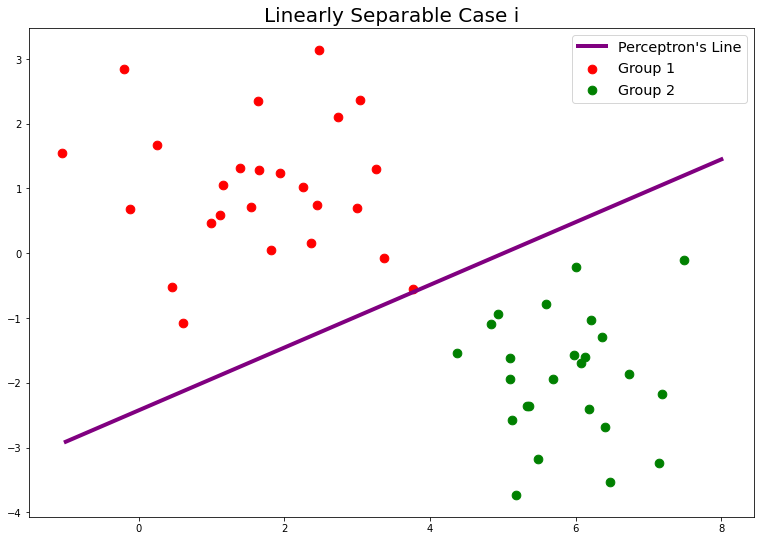

[ 0.98312622 -1.55343426 -2.9       ]


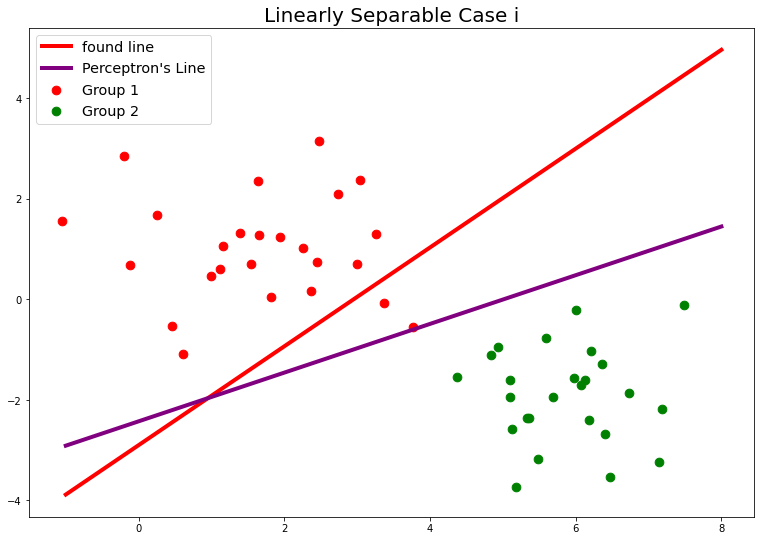

In [3]:
## CASE 1 TRAINING POINTS ARE LINEARLY SEPARABLE.
X, Y = make_blobs(n_samples = 50,
                  centers=([ 1.5, 0.9 ], [6, -2] ),
                  n_features=2,
                  random_state=0)

for idx, item in enumerate(Y):
    if item == 0:
        Y[idx] = -1

        
svm = SVM_STOCH(0.01)
svm.fit(X,Y, 1000)
svm.plot(X,Y, True, "Linearly Separable Case i")
svm.plot(X,Y, False, "Linearly Separable Case i")


## The found line here is not always accurate, and I am not sure how to fix this.
## For the most part I believe this is the code we need (Above) Lookup Pegasous with SGD.
## I feel like there is a way to improve this, but I don't know how.

# Yang, I followed the psudocode here: https://davidrosenberg.github.io/mlcourse/Archive/2018/Homework/hw3.pdf -
# - under the section "Support Vector Machine via Pegasos"
